CME538 Big Project (Crime Analysis)

Setup notebook

In [299]:
import os
import json
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pylab as plt
import geopandas as gpd
%pip install folium
import folium
from shapely.geometry import Point

# Configure Notebook
#for plots to be inline
%matplotlib inline 
#for auto_complete 
%config Completer.use_jedi = False 

plt.style.use('fivethirtyeight')
sns.set_context("notebook")

Note: you may need to restart the kernel to use updated packages.


Import Toronto and Vancouver crime data

In [300]:
T_and_V_house_file = ['Toronto_Houses_Facilities_0.5km.csv', 'Vancouver_Houses_Facilities_0.5km.csv', 'Toronto_Houses_Facilities_1km.csv', 'Vancouver_Houses_Facilities_1km.csv', 'Toronto_Houses_Facilities_1.5km.csv', 'Vancouver_Houses_Facilities_1.5km.csv','Toronto_houses_with_crime_data_0.5km.csv', 'Vancouver_houses_with_crime_data_0.5km.csv', 'Toronto_houses_with_crime_data_1km.csv', 'Vancouver_houses_with_crime_data_1km.csv', 'Toronto_houses_with_crime_data_1.5km.csv', 'Vancouver_houses_with_crime_data_1.5km.csv','Toronto_houses_outside_of_boundary.csv', 'Vancouver_houses_outside_of_boundary.csv']

cities_crime_data = [files for files in os.listdir() if 'csv' in files and files not in T_and_V_house_file]
print (cities_crime_data)
print (len(cities_crime_data))


['Break_and_Enter_Open_Data_-4162138114387241565.csv', 'Auto_Theft_Open_Data_2870970057948105368.csv', 'Robbery_Open_Data_-8137008090406279750.csv', 'Shooting_and_Firearm_Discharges_Open_Data_1545415500785772026.csv', 'Assault_Open_Data_3151380405449872223.csv', 'crimedata_csv_AllNeighbourhoods_2024.csv', 'crimedata_csv_AllNeighbourhoods_2020.csv', 'Homicides_Open_Data_ASR_RC_TBL_002_4450242736547431910.csv', 'crimedata_csv_AllNeighbourhoods_2021.csv', 'crimedata_csv_AllNeighbourhoods_2023.csv', 'Theft_From_Motor_Vehicle_Open_Data_6307943567805975186.csv', 'crimedata_csv_AllNeighbourhoods_2022.csv', 'Theft_Over_Open_Data_8796232388611790863.csv', 'HATE_CRIME_OPEN_DATA_-9134139640847719814.csv']
14


Seperate Toronto and Vancouver data

In [301]:
Toronto_filename = []
Vancouver_filename = []

for file in cities_crime_data:
    if 'crimedata_csv_' in file:
        Vancouver_filename.append(file)
    else:
        Toronto_filename.append(file)

print(Toronto_filename)
print(Vancouver_filename)

['Break_and_Enter_Open_Data_-4162138114387241565.csv', 'Auto_Theft_Open_Data_2870970057948105368.csv', 'Robbery_Open_Data_-8137008090406279750.csv', 'Shooting_and_Firearm_Discharges_Open_Data_1545415500785772026.csv', 'Assault_Open_Data_3151380405449872223.csv', 'Homicides_Open_Data_ASR_RC_TBL_002_4450242736547431910.csv', 'Theft_From_Motor_Vehicle_Open_Data_6307943567805975186.csv', 'Theft_Over_Open_Data_8796232388611790863.csv', 'HATE_CRIME_OPEN_DATA_-9134139640847719814.csv']
['crimedata_csv_AllNeighbourhoods_2024.csv', 'crimedata_csv_AllNeighbourhoods_2020.csv', 'crimedata_csv_AllNeighbourhoods_2021.csv', 'crimedata_csv_AllNeighbourhoods_2023.csv', 'crimedata_csv_AllNeighbourhoods_2022.csv']


# Setup Toronto crime data

In [302]:
# initialize empty list of dataframes for Toronto crime data
Toronto_crime_list = []

# Create a dataframe for Toronto that has data from the first 8 csv files
for i in range(8):
    Toronto_crime_df = pd.read_csv(Toronto_filename[i], index_col=None, header=0)
    Toronto_crime_df['OFFENCE_TYPE'] = Toronto_filename[i].split('_Open')[0].replace("_"," ")
    Toronto_crime_list.append(Toronto_crime_df)

# import the last csv file
Toronto_hate_crime_df = pd.read_csv(Toronto_filename[-1], index_col=None, header=0)
Toronto_hate_crime_df = Toronto_hate_crime_df.rename(columns = {'OCCURRENCE_DATE': 'OCC_DATE'})
Toronto_hate_crime_df['OFFENCE_TYPE'] = "Hate"
Toronto_crime_list.append(Toronto_hate_crime_df)


T_crime = pd.concat(Toronto_crime_list, ignore_index=True)
    

# view dataframe
T_crime.head()


OBJECTID EVENT_UNIQUE_ID          REPORT_DATE               OCC_DATE  \
0         1  GO-20141263143  1/1/2014 5:00:00 AM    1/1/2014 5:00:00 AM   
1         2  GO-20141263220  1/1/2014 5:00:00 AM    1/1/2014 5:00:00 AM   
2         3  GO-20141263750  1/1/2014 5:00:00 AM    1/1/2014 5:00:00 AM   
3         4  GO-20141264377  1/1/2014 5:00:00 AM  12/30/2013 5:00:00 AM   
4         5  GO-20141262997  1/1/2014 5:00:00 AM    1/1/2014 5:00:00 AM   

   REPORT_YEAR REPORT_MONTH  REPORT_DAY  REPORT_DOY  REPORT_DOW  REPORT_HOUR  \
0       2014.0      January         1.0         1.0  Wednesday          16.0   
1       2014.0      January         1.0         1.0  Wednesday          16.0   
2       2014.0      January         1.0         1.0  Wednesday          18.0   
3       2014.0      January         1.0         1.0  Wednesday          21.0   
4       2014.0      January         1.0         1.0  Wednesday          15.0   

   ...  MENTAL_OR_PHYSICAL_DISABILITY RACE_BIAS  ETHNICITY_BIAS  \
0  ...                            NaN       NaN             NaN   
1  ...                            NaN       NaN             NaN   
2  ...                            NaN       NaN             NaN   
3  ...                            NaN       NaN             NaN   
4  ...                            NaN       NaN             NaN   

   LANGUAGE_BIAS RELIGION_BIAS  SEXUAL_ORIENTATION_BIAS GENDER_BIAS  \
0            NaN           NaN                      NaN         NaN   
1            NaN           NaN                      NaN         NaN   
2            NaN           NaN                      NaN         NaN   
3            NaN           NaN                      NaN         NaN   
4            NaN           NaN                      NaN         NaN   

  MULTIPLE_BIAS PRIMARY_OFFENCE  ARREST_MADE  
0           NaN             NaN          NaN  
1           NaN             NaN          NaN  
2           NaN             NaN          NaN  
3           NaN             NaN          NaN  
4           NaN             NaN          NaN  

[5 rows x 52 columns]

In [303]:
# creat a list with all columns' name in it
T_column_names = list(T_crime.columns.values)

# assign all the required column to a list
required_columns = ['OCC_DATE', 'DIVISION','OFFENCE_TYPE','HOOD_158','NEIGHBOURHOOD_158','LONG_WGS84','LAT_WGS84']

# removed irrelevant columns
for name in T_column_names:
    if name not in required_columns:
        T_crime = T_crime.drop(name, axis = 'columns')

# preview the dataframe
T_crime.head()

OCC_DATE DIVISION HOOD_158            NEIGHBOURHOOD_158  \
0    1/1/2014 5:00:00 AM      D32      037         Willowdale West (37)   
1    1/1/2014 5:00:00 AM      D43      136              West Hill (136)   
2    1/1/2014 5:00:00 AM      D53      095                   Annex (95)   
3  12/30/2013 5:00:00 AM      D33      052         Bayview Village (52)   
4    1/1/2014 5:00:00 AM      D41      122  Birchcliffe-Cliffside (122)   

   LONG_WGS84  LAT_WGS84     OFFENCE_TYPE  
0  -79.414596  43.771695  Break and Enter  
1  -79.193918  43.760196  Break and Enter  
2  -79.402006  43.668389  Break and Enter  
3  -79.384036  43.765388  Break and Enter  
4  -79.251830  43.705288  Break and Enter

In [304]:
# Add a new column for occur year of each crime 
T_crime['occ_year'] = T_crime['OCC_DATE'].str.split().str[0].str.split('/').str[-1]

# drop the crime if it occurs before 2020
T_crime = T_crime[T_crime['occ_year'].astype(int) >= 2020]
T_crime = T_crime.drop(columns = ['occ_year'])

# rename the columns
T_crime = T_crime.rename(columns = {'OCC_DATE':'OCCURRENCE_DATE','LONG_WGS84':'LONGITUDE','LAT_WGS84':'LATITUDE'})
T_crime.head()

OCCURRENCE_DATE DIVISION HOOD_158           NEIGHBOURHOOD_158  \
43680  1/1/2020 5:00:00 AM      D11      111     Rockcliffe-Smythe (111)   
43682  1/1/2020 5:00:00 AM      D23      001  West Humber-Clairville (1)   
43683  1/1/2020 5:00:00 AM      D52      164      Wellington Place (164)   
43685  1/1/2020 5:00:00 AM      D12      030    Brookhaven-Amesbury (30)   
43688  1/1/2020 5:00:00 AM      D43      135           Morningside (135)   

       LONGITUDE   LATITUDE     OFFENCE_TYPE  
43680 -79.485666  43.668502  Break and Enter  
43682 -79.584960  43.678337  Break and Enter  
43683 -79.393412  43.649371  Break and Enter  
43685 -79.477046  43.704280  Break and Enter  
43688 -79.212020  43.775996  Break and Enter

In [305]:
# find the all crime types in Toronto
list(T_crime['OFFENCE_TYPE'].unique())


['Break and Enter',
 'Auto Theft',
 'Robbery',
 'Shooting and Firearm Discharges',
 'Assault',
 'Homicides',
 'Theft From Motor Vehicle',
 'Theft Over',
 'Hate']

In [306]:
# classify the crimes into three levels and assign them to different lists
T_level_1 = ['Shooting and Firearm Discharges', 'Homicides'] # severe crime
T_level_2 = ['Break and Enter', 'Assault'] # moderate crime
T_level_3 = ['Theft From Motor Vehicle', 'Theft Over', 'Hate', 'Auto Theft', 'Robbery', ] # minor crime

# define a function to classify the crime level
def T_classify_crime_level(crime_type):
    # define rules for mapping crime types to crime levels
    if crime_type in T_level_1:
        return "Severe crime"
    elif crime_type in T_level_2:
        return "Moderate crime"
    else:
        return "Minor crime"

# apply the function to the "OFFENCE_TYPE" column to create the "LEVEL_OF_CRIME" column
T_crime['LEVEL_OF_CRIME'] = T_crime['OFFENCE_TYPE'].apply(T_classify_crime_level)

# drop the old index 
T_crime.reset_index(drop = True, inplace = True)

# preview the dataframe
T_crime.head()

OCCURRENCE_DATE DIVISION HOOD_158           NEIGHBOURHOOD_158  \
0  1/1/2020 5:00:00 AM      D11      111     Rockcliffe-Smythe (111)   
1  1/1/2020 5:00:00 AM      D23      001  West Humber-Clairville (1)   
2  1/1/2020 5:00:00 AM      D52      164      Wellington Place (164)   
3  1/1/2020 5:00:00 AM      D12      030    Brookhaven-Amesbury (30)   
4  1/1/2020 5:00:00 AM      D43      135           Morningside (135)   

   LONGITUDE   LATITUDE     OFFENCE_TYPE  LEVEL_OF_CRIME  
0 -79.485666  43.668502  Break and Enter  Moderate crime  
1 -79.584960  43.678337  Break and Enter  Moderate crime  
2 -79.393412  43.649371  Break and Enter  Moderate crime  
3 -79.477046  43.704280  Break and Enter  Moderate crime  
4 -79.212020  43.775996  Break and Enter  Moderate crime

In [307]:
hate_df = T_crime[T_crime["OFFENCE_TYPE"] == "Hate"]
hate_df.head()

OCCURRENCE_DATE DIVISION HOOD_158         NEIGHBOURHOOD_158  \
239485  1/1/2020 5:00:00 AM      D13      032  Englemount-Lawrence (32)   
239486  1/5/2020 5:00:00 AM      D52      169      Bay-Cloverhill (169)   
239487  1/8/2020 5:00:00 AM      D14      172  Dovercourt Village (172)   
239488  1/9/2020 5:00:00 AM      D53      095                Annex (95)   
239489  1/9/2020 5:00:00 AM      D51      072          Regent Park (72)   

        LONGITUDE  LATITUDE OFFENCE_TYPE LEVEL_OF_CRIME  
239485        NaN       NaN         Hate    Minor crime  
239486        NaN       NaN         Hate    Minor crime  
239487        NaN       NaN         Hate    Minor crime  
239488        NaN       NaN         Hate    Minor crime  
239489        NaN       NaN         Hate    Minor crime

In [308]:
# import Toronto geojson map
Toronto_map = gpd.read_file("Neighbourhoods - 4326.geojson")

In [309]:
Toronto_map.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [310]:
# preview the geodataframe
Toronto_map.head()

_id  AREA_ID  AREA_ATTR_ID  PARENT_AREA_ID AREA_SHORT_CODE AREA_LONG_CODE  \
0    1  2502366      26022881               0             174            174   
1    2  2502365      26022880               0             173            173   
2    3  2502364      26022879               0             172            172   
3    4  2502363      26022878               0             171            171   
4    5  2502362      26022877               0             170            170   

                   AREA_NAME                        AREA_DESC  \
0  South Eglinton-Davisville  South Eglinton-Davisville (174)   
1              North Toronto              North Toronto (173)   
2         Dovercourt Village         Dovercourt Village (172)   
3   Junction-Wallace Emerson   Junction-Wallace Emerson (171)   
4         Yonge-Bay Corridor         Yonge-Bay Corridor (170)   

                         CLASSIFICATION CLASSIFICATION_CODE    OBJECTID  \
0  Not an NIA or Emerging Neighbourhood                  NA  17824737.0   
1  Not an NIA or Emerging Neighbourhood                  NA  17824753.0   
2  Not an NIA or Emerging Neighbourhood                  NA  17824769.0   
3  Not an NIA or Emerging Neighbourhood                  NA  17824785.0   
4  Not an NIA or Emerging Neighbourhood                  NA  17824801.0   

                                            geometry  
0  MULTIPOLYGON (((-79.38635 43.69783, -79.38623 ...  
1  MULTIPOLYGON (((-79.39744 43.70693, -79.39837 ...  
2  MULTIPOLYGON (((-79.43411 43.66015, -79.43537 ...  
3  MULTIPOLYGON (((-79.4387 43.66766, -79.43841 4...  
4  MULTIPOLYGON (((-79.38404 43.64497, -79.38502 ...

In [311]:
# check the dataframe
Toronto_map.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   _id                  158 non-null    int32   
 1   AREA_ID              158 non-null    int32   
 2   AREA_ATTR_ID         158 non-null    int32   
 3   PARENT_AREA_ID       158 non-null    int32   
 4   AREA_SHORT_CODE      158 non-null    object  
 5   AREA_LONG_CODE       158 non-null    object  
 6   AREA_NAME            158 non-null    object  
 7   AREA_DESC            158 non-null    object  
 8   CLASSIFICATION       158 non-null    object  
 9   CLASSIFICATION_CODE  158 non-null    object  
 10  OBJECTID             158 non-null    float64 
 11  geometry             158 non-null    geometry
dtypes: float64(1), geometry(1), int32(4), object(6)
memory usage: 12.5+ KB


<Axes: >

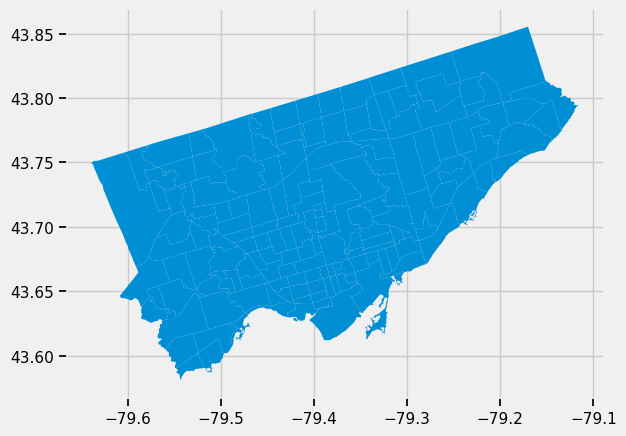

In [312]:
# plot the toronto neighbourhood dataset
Toronto_map.plot()

In [313]:
T_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240567 entries, 0 to 240566
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   OCCURRENCE_DATE    240567 non-null  object 
 1   DIVISION           240567 non-null  object 
 2   HOOD_158           240567 non-null  object 
 3   NEIGHBOURHOOD_158  240567 non-null  object 
 4   LONGITUDE          239485 non-null  float64
 5   LATITUDE           239485 non-null  float64
 6   OFFENCE_TYPE       240567 non-null  object 
 7   LEVEL_OF_CRIME     240567 non-null  object 
dtypes: float64(2), object(6)
memory usage: 14.7+ MB


In [314]:
# Drop row where 'LONGITUDE', 'LATITUDE', and 'HOOD_158' are all missing
T_crime_dropped = T_crime[~((T_crime['LONGITUDE'].isnull()) & (T_crime['LATITUDE'].isnull()) & (T_crime['HOOD_158'] == 'NSA'))]

# seperate crimes with/without coordinates
T_crime_with_coord = T_crime_dropped[(T_crime_dropped["LONGITUDE"] != 0) & (T_crime_dropped["LATITUDE"]!= 0)] # crime events with accurate long and lat
T_crime_without_coord = T_crime_dropped[(T_crime_dropped["LONGITUDE"].isnull()) & (T_crime_dropped["LATITUDE"].isnull())] # crime events without accurate long and lat

# set up geodataframe for crimes with coordinates
T_crime_with_coord_gdf = gpd.GeoDataFrame(T_crime_with_coord, geometry = gpd.points_from_xy(T_crime_with_coord.LONGITUDE, T_crime_with_coord.LATITUDE))

In [315]:
# set up geodataframe for crimes without coordinates
T_crime_without_coord_gdf = T_crime_without_coord.merge(Toronto_map[['AREA_LONG_CODE','geometry']], left_on='HOOD_158', right_on='AREA_LONG_CODE', how='inner')

# creat an empty list to store centroid geometries
geometry_centroids = []
# Iterate over each row ad find the centroid of the geometry
for index, row in T_crime_without_coord_gdf.iterrows():
    g_centroid = row['geometry'].centroid
    geometry_centroids.append(g_centroid)

# update the geometry column with centroid 
T_crime_without_coord_gdf['geometry'] = geometry_centroids

# combine the two geodataframes
T_crime_gdf = pd.concat([T_crime_with_coord_gdf,gpd.GeoDataFrame(T_crime_without_coord_gdf)], ignore_index=True)

# set the coordinate reference system to WGS84
T_crime_gdf.set_crs("EPSG:4326", inplace = True)

T_crime_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [316]:
# check crime counts for each level
T_crime_level_test = T_crime_gdf['LEVEL_OF_CRIME'].value_counts()
print(T_crime_level_test)

LEVEL_OF_CRIME
Moderate crime    130766
Minor crime       105473
Severe crime        2318
Name: count, dtype: int64


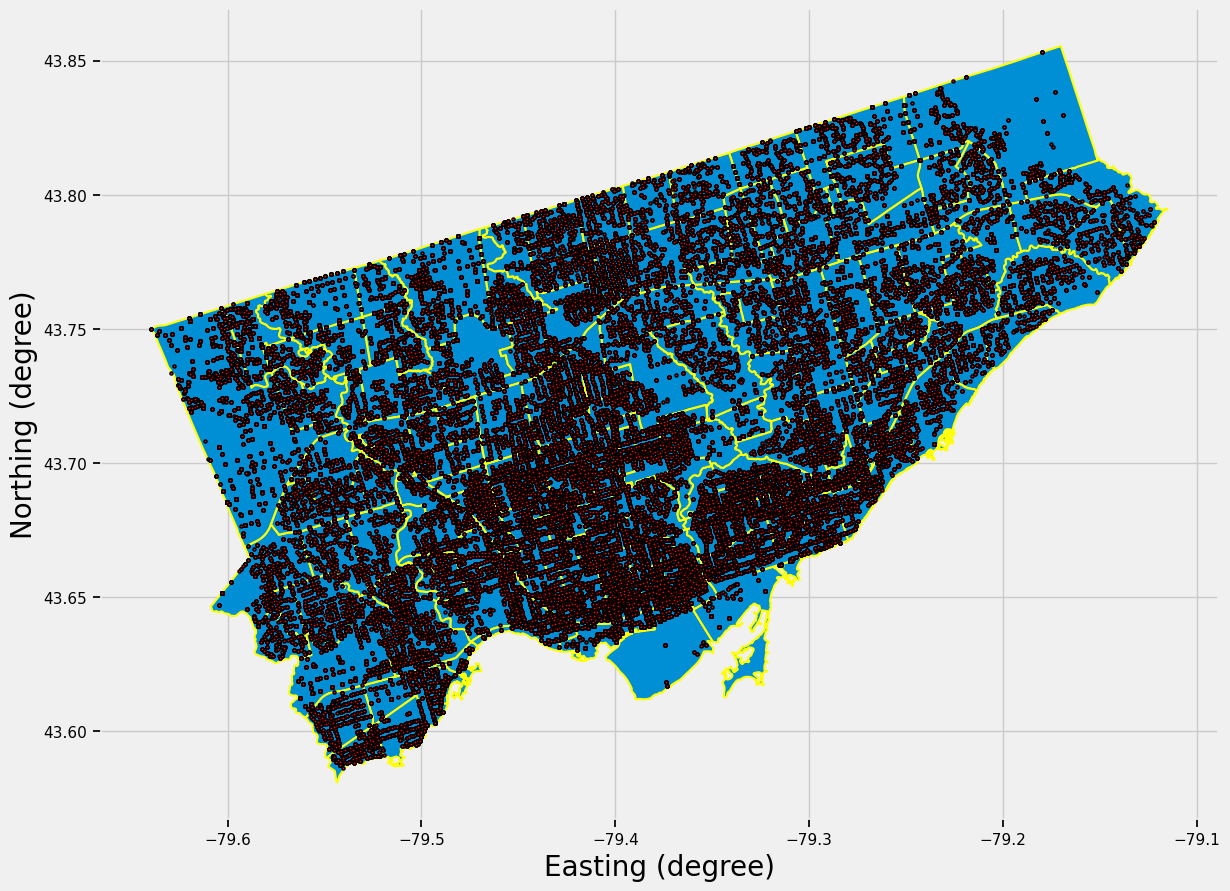

In [317]:
# plot Toronto neighbourhoods and crime data together
ax = Toronto_map.plot(figsize = (24,10), edgecolor='yellow', linewidth=1.5)
T_crime_gdf.plot(ax=ax, color='red', edgecolor='k', label='crime event', markersize= 5)

#plt.legend(fontsize=16, loc=2)
plt.xlabel('Easting (degree)', fontsize=20)
plt.ylabel('Northing (degree)', fontsize=20)
plt.show()


In [318]:
# add new column that represents total crime in each neighbourhood using 'within'
Toronto_map['Total_crimes (2020-2024)'] = Toronto_map.apply(lambda row: T_crime_gdf.within(row.geometry).sum(),axis = 1)
Toronto_map['Average_total_crime (per_year)'] = Toronto_map.apply(lambda row: round(T_crime_gdf.within(row.geometry).sum()/5),axis = 1)
Toronto_map


_id  AREA_ID  AREA_ATTR_ID  PARENT_AREA_ID AREA_SHORT_CODE  \
0      1  2502366      26022881               0             174   
1      2  2502365      26022880               0             173   
2      3  2502364      26022879               0             172   
3      4  2502363      26022878               0             171   
4      5  2502362      26022877               0             170   
..   ...      ...           ...             ...             ...   
153  154  2502213      26022728               0             001   
154  155  2502212      26022727               0             024   
155  156  2502211      26022726               0             023   
156  157  2502210      26022725               0             022   
157  158  2502209      26022724               0             021   

    AREA_LONG_CODE                  AREA_NAME  \
0              174  South Eglinton-Davisville   
1              173              North Toronto   
2              172         Dovercourt Village   
3              171   Junction-Wallace Emerson   
4              170         Yonge-Bay Corridor   
..             ...                        ...   
153            001     West Humber-Clairville   
154            024                Black Creek   
155            023       Pelmo Park-Humberlea   
156            022                 Humbermede   
157            021              Humber Summit   

                           AREA_DESC                        CLASSIFICATION  \
0    South Eglinton-Davisville (174)  Not an NIA or Emerging Neighbourhood   
1                North Toronto (173)  Not an NIA or Emerging Neighbourhood   
2           Dovercourt Village (172)  Not an NIA or Emerging Neighbourhood   
3     Junction-Wallace Emerson (171)  Not an NIA or Emerging Neighbourhood   
4           Yonge-Bay Corridor (170)  Not an NIA or Emerging Neighbourhood   
..                               ...                                   ...   
153       West Humber-Clairville (1)  Not an NIA or Emerging Neighbourhood   
154                 Black Creek (24)        Neighbourhood Improvement Area   
155        Pelmo Park-Humberlea (23)  Not an NIA or Emerging Neighbourhood   
156                  Humbermede (22)        Neighbourhood Improvement Area   
157               Humber Summit (21)        Neighbourhood Improvement Area   

    CLASSIFICATION_CODE    OBJECTID  \
0                    NA  17824737.0   
1                    NA  17824753.0   
2                    NA  17824769.0   
3                    NA  17824785.0   
4                    NA  17824801.0   
..                  ...         ...   
153                  NA  17827185.0   
154                 NIA  17827201.0   
155                  NA  17827217.0   
156                 NIA  17827233.0   
157                 NIA  17827249.0   

                                              geometry  \
0    MULTIPOLYGON (((-79.38635 43.69783, -79.38623 ...   
1    MULTIPOLYGON (((-79.39744 43.70693, -79.39837 ...   
2    MULTIPOLYGON (((-79.43411 43.66015, -79.43537 ...   
3    MULTIPOLYGON (((-79.4387 43.66766, -79.43841 4...   
4    MULTIPOLYGON (((-79.38404 43.64497, -79.38502 ...   
..                                                 ...   
153  MULTIPOLYGON (((-79.59037 43.73401, -79.58942 ...   
154  MULTIPOLYGON (((-79.51915 43.77399, -79.51901 ...   
155  MULTIPOLYGON (((-79.53225 43.73505, -79.52938 ...   
156  MULTIPOLYGON (((-79.52813 43.74425, -79.52721 ...   
157  MULTIPOLYGON (((-79.53396 43.76886, -79.53227 ...   

     Total_crimes (2020-2024)  Average_total_crime (per_year)  
0                        1233                             247  
1                         988                             198  
2                         754                             151  
3                        1641                             328  
4                        2998                             600  
..                        ...                             ...  
153                      7010                            140

find total number of severe, moderate, and minor crimes in each neighbourhood

In [319]:
# generate a geodataframe for each crime level
T_severe_gdf = T_crime_gdf[T_crime_gdf['LEVEL_OF_CRIME'] == 'Severe crime'] # for severe crimes
T_moderate_gdf = T_crime_gdf[T_crime_gdf['LEVEL_OF_CRIME'] == 'Moderate crime'] # for moderate crimes
T_minor_gdf = T_crime_gdf[T_crime_gdf['LEVEL_OF_CRIME'] == 'Minor crime'] # for minor crimes

# add new column for each level of crime
Toronto_map['Total_severe_crimes (2020-2024)'] = Toronto_map.apply(lambda row: T_severe_gdf.within(row.geometry).sum(),axis = 1)
Toronto_map['Average_severe_crimes (per_year)'] = Toronto_map.apply(lambda row: round(T_severe_gdf.within(row.geometry).sum()/5),axis = 1)
Toronto_map['Total_moderate_crimes (2020-2024)'] = Toronto_map.apply(lambda row: T_moderate_gdf.within(row.geometry).sum(),axis = 1)
Toronto_map['Average_moderate_crimes (per_year)'] = Toronto_map.apply(lambda row: round(T_moderate_gdf.within(row.geometry).sum()/5),axis = 1)
Toronto_map['Total_minor_crimes (2020-2024)'] = Toronto_map.apply(lambda row: T_minor_gdf.within(row.geometry).sum(),axis = 1)
Toronto_map['Average_minor_crimes (per_year)'] = Toronto_map.apply(lambda row: round(T_minor_gdf.within(row.geometry).sum()/5),axis = 1)

Toronto_map

_id  AREA_ID  AREA_ATTR_ID  PARENT_AREA_ID AREA_SHORT_CODE  \
0      1  2502366      26022881               0             174   
1      2  2502365      26022880               0             173   
2      3  2502364      26022879               0             172   
3      4  2502363      26022878               0             171   
4      5  2502362      26022877               0             170   
..   ...      ...           ...             ...             ...   
153  154  2502213      26022728               0             001   
154  155  2502212      26022727               0             024   
155  156  2502211      26022726               0             023   
156  157  2502210      26022725               0             022   
157  158  2502209      26022724               0             021   

    AREA_LONG_CODE                  AREA_NAME  \
0              174  South Eglinton-Davisville   
1              173              North Toronto   
2              172         Dovercourt Village   
3              171   Junction-Wallace Emerson   
4              170         Yonge-Bay Corridor   
..             ...                        ...   
153            001     West Humber-Clairville   
154            024                Black Creek   
155            023       Pelmo Park-Humberlea   
156            022                 Humbermede   
157            021              Humber Summit   

                           AREA_DESC                        CLASSIFICATION  \
0    South Eglinton-Davisville (174)  Not an NIA or Emerging Neighbourhood   
1                North Toronto (173)  Not an NIA or Emerging Neighbourhood   
2           Dovercourt Village (172)  Not an NIA or Emerging Neighbourhood   
3     Junction-Wallace Emerson (171)  Not an NIA or Emerging Neighbourhood   
4           Yonge-Bay Corridor (170)  Not an NIA or Emerging Neighbourhood   
..                               ...                                   ...   
153       West Humber-Clairville (1)  Not an NIA or Emerging Neighbourhood   
154                 Black Creek (24)        Neighbourhood Improvement Area   
155        Pelmo Park-Humberlea (23)  Not an NIA or Emerging Neighbourhood   
156                  Humbermede (22)        Neighbourhood Improvement Area   
157               Humber Summit (21)        Neighbourhood Improvement Area   

    CLASSIFICATION_CODE    OBJECTID  \
0                    NA  17824737.0   
1                    NA  17824753.0   
2                    NA  17824769.0   
3                    NA  17824785.0   
4                    NA  17824801.0   
..                  ...         ...   
153                  NA  17827185.0   
154                 NIA  17827201.0   
155                  NA  17827217.0   
156                 NIA  17827233.0   
157                 NIA  17827249.0   

                                              geometry  \
0    MULTIPOLYGON (((-79.38635 43.69783, -79.38623 ...   
1    MULTIPOLYGON (((-79.39744 43.70693, -79.39837 ...   
2    MULTIPOLYGON (((-79.43411 43.66015, -79.43537 ...   
3    MULTIPOLYGON (((-79.4387 43.66766, -79.43841 4...   
4    MULTIPOLYGON (((-79.38404 43.64497, -79.38502 ...   
..                                                 ...   
153  MULTIPOLYGON (((-79.59037 43.73401, -79.58942 ...   
154  MULTIPOLYGON (((-79.51915 43.77399, -79.51901 ...   
155  MULTIPOLYGON (((-79.53225 43.73505, -79.52938 ...   
156  MULTIPOLYGON (((-79.52813 43.74425, -79.52721 ...   
157  MULTIPOLYGON (((-79.53396 43.76886, -79.53227 ...   

     Total_crimes (2020-2024)  Average_total_crime (per_year)  \
0                        1233                             247   
1                         988                             198   
2                         754                             151   
3                        1641                             328   
4                        2998                             600   
..                        ...                             ...   
153                      7010                        

clean and sort the Toronto_map geodataframe


In [320]:
# drop irrelavent columns
T_redun_cols = ['_id', 'AREA_ID', 'AREA_ATTR_ID', 'PARENT_AREA_ID', 'AREA_SHORT_CODE', 'AREA_DESC', 'CLASSIFICATION', 'CLASSIFICATION_CODE', 'OBJECTID']
Toronto_map.drop(columns = T_redun_cols, inplace = True)

# sort the geodataframe based on the Average total_crime per year
Toronto_map = Toronto_map.sort_values(by='Average_total_crime (per_year)', ascending = False)
Toronto_map

AREA_LONG_CODE                AREA_NAME  \
153            001   West Humber-Clairville   
37             168      Downtown Yonge East   
82             073                Moss Park   
125            027  York University Heights   
80             078     Kensington-Chinatown   
..             ...                      ...   
60             097           Yonge-St.Clair   
49             109       Caledonia-Fairbank   
86             069              Blake-Jones   
97             058            Old East York   
73             114       Lambton Baby Point   

                                              geometry  \
153  MULTIPOLYGON (((-79.59037 43.73401, -79.58942 ...   
37   MULTIPOLYGON (((-79.37655 43.66201, -79.3759 4...   
82   MULTIPOLYGON (((-79.36462 43.65601, -79.36446 ...   
125  MULTIPOLYGON (((-79.46847 43.77519, -79.46779 ...   
80   MULTIPOLYGON (((-79.38994 43.65859, -79.38965 ...   
..                                                 ...   
60   MULTIPOLYGON (((-79.3972 43.69565, -79.39692 4...   
49   MULTIPOLYGON (((-79.44612 43.68557, -79.44577 ...   
86   MULTIPOLYGON (((-79.34073 43.66927, -79.34082 ...   
97   MULTIPOLYGON (((-79.33212 43.70304, -79.33199 ...   
73   MULTIPOLYGON (((-79.49923 43.66581, -79.49921 ...   

     Total_crimes (2020-2024)  Average_total_crime (per_year)  \
153                      7010                            1402   
37                       5634                            1127   
82                       5073                            1015   
125                      4585                             917   
80                       3837                             767   
..                        ...                             ...   
60                        521                             104   
49                        484                              97   
86                        485                              97   
97                        376                              75   
73                        331                              66   

     Total_severe_crimes (2020-2024)  Average_severe_crimes (per_year)  \
153                               35                                 7   
37                                29                                 6   
82                                35                                 7   
125                               59                                12   
80                                31                                 6   
..                               ...                               ...   
60                                 0                                 0   
49                                 8                                 2   
86                                12                                 2   
97                                 6                                 1   
73                                 5                                 1   

     Total_moderate_crimes (2020-2024)  Average_moderate_crimes (per_year)  \
153                               1848                                 370   
37                                4059                                 812   
82                                3706                                 741   
125                               2215                                 443   
80                                2546                                 509   
..                                 ...                                 ...   
60                                 299                                  60   
49                                 263                                  53   
86                                 325                                  65   
97                                 176                                  35   
73                                 202                                  40   

     Total_minor_crimes (2020-2024)  Average_minor_crimes (per_year)  
153                            5127                             

Plot Choropleth map for Toronto

In [321]:
T_choro_map = folium.Map(location=[43.7, -79.42], zoom_start=11)

folium.Choropleth(
    geo_data=Toronto_map,
    data=Toronto_map,
    columns=['AREA_NAME','Average_total_crime (per_year)'],
    key_on='feature.properties.AREA_NAME',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Average_total_crime (per_year)'
).add_to(T_choro_map)

T_choro_map

# Set up Vancouver data

In [322]:
# initialize empty dataframe for Vancouver crime data
Vancouver_crime_list = []

# Create a dataframe for Vancouver that has data from all 5 csv files
for Vancouver_file in Vancouver_filename:
    Vancouver_crime_df = pd.read_csv(Vancouver_file, index_col=None, header=0)
    Vancouver_crime_list.append(Vancouver_crime_df)

V_crime = pd.concat(Vancouver_crime_list, ignore_index=True)
    

# view dataframe
V_crime.head()
V_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167744 entries, 0 to 167743
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TYPE           167744 non-null  object 
 1   YEAR           167744 non-null  int64  
 2   MONTH          167744 non-null  int64  
 3   DAY            167744 non-null  int64  
 4   HOUR           167744 non-null  int64  
 5   MINUTE         167744 non-null  int64  
 6   HUNDRED_BLOCK  167744 non-null  object 
 7   NEIGHBOURHOOD  167713 non-null  object 
 8   X              167733 non-null  float64
 9   Y              167733 non-null  float64
dtypes: float64(2), int64(5), object(3)
memory usage: 12.8+ MB


In [323]:
# combine year, month, day, hour, and minute into a single column 
V_crime['OCC_DATE'] = pd.to_datetime(V_crime[['YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE']])

# format the OCC_DATE column as '1/1/2014 5:00:00 AM'
V_crime['OCC_DATE'] = V_crime['OCC_DATE'].dt.strftime('%-m/%-d/%Y %-I:%M:%S %p')

# preview the dataframe
V_crime.head()

TYPE  YEAR  MONTH  DAY  HOUR  MINUTE  \
0  Break and Enter Commercial  2024      2   11    22       5   
1  Break and Enter Commercial  2024      5    2     1      33   
2  Break and Enter Commercial  2024      3   17     0       0   
3  Break and Enter Commercial  2024      6   16    16       0   
4  Break and Enter Commercial  2024      1    8     0       0   

       HUNDRED_BLOCK              NEIGHBOURHOOD            X             Y  \
0     10XX BEACH AVE  Central Business District  490249.2307  5.458167e+06   
1     10XX BEACH AVE  Central Business District  490268.4320  5.458143e+06   
2  10XX BROUGHTON ST                   West End  490233.2324  5.459144e+06   
3  10XX BROUGHTON ST                   West End  490233.2324  5.459144e+06   
4  10XX BROUGHTON ST                   West End  490247.1512  5.459171e+06   

                OCC_DATE  
0  2/11/2024 10:05:00 PM  
1    5/2/2024 1:33:00 AM  
2  3/17/2024 12:00:00 AM  
3   6/16/2024 4:00:00 PM  
4   1/8/2024 12:00:00 AM

In [324]:
# drop the year, month, day, hour, minute, and hundred_block columns
V_crime = V_crime.drop(columns = ['YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'HUNDRED_BLOCK'])
V_crime.head()

TYPE              NEIGHBOURHOOD            X  \
0  Break and Enter Commercial  Central Business District  490249.2307   
1  Break and Enter Commercial  Central Business District  490268.4320   
2  Break and Enter Commercial                   West End  490233.2324   
3  Break and Enter Commercial                   West End  490233.2324   
4  Break and Enter Commercial                   West End  490247.1512   

              Y               OCC_DATE  
0  5.458167e+06  2/11/2024 10:05:00 PM  
1  5.458143e+06    5/2/2024 1:33:00 AM  
2  5.459144e+06  3/17/2024 12:00:00 AM  
3  5.459144e+06   6/16/2024 4:00:00 PM  
4  5.459171e+06   1/8/2024 12:00:00 AM

In [325]:
V_crime_type = list(V_crime['TYPE'].unique())
print (V_crime_type)

['Break and Enter Commercial', 'Break and Enter Residential/Other', 'Homicide', 'Mischief', 'Offence Against a Person', 'Other Theft', 'Theft from Vehicle', 'Theft of Bicycle', 'Theft of Vehicle', 'Vehicle Collision or Pedestrian Struck (with Fatality)', 'Vehicle Collision or Pedestrian Struck (with Injury)']


In [326]:
# preview V_crime
V_crime

TYPE  \
0                              Break and Enter Commercial   
1                              Break and Enter Commercial   
2                              Break and Enter Commercial   
3                              Break and Enter Commercial   
4                              Break and Enter Commercial   
...                                                   ...   
167739  Vehicle Collision or Pedestrian Struck (with I...   
167740  Vehicle Collision or Pedestrian Struck (with I...   
167741  Vehicle Collision or Pedestrian Struck (with I...   
167742  Vehicle Collision or Pedestrian Struck (with I...   
167743  Vehicle Collision or Pedestrian Struck (with I...   

                    NEIGHBOURHOOD            X             Y  \
0       Central Business District  490249.2307  5.458167e+06   
1       Central Business District  490268.4320  5.458143e+06   
2                        West End  490233.2324  5.459144e+06   
3                        West End  490233.2324  5.459144e+06   
4                        West End  490247.1512  5.459171e+06   
...                           ...          ...           ...   
167739             Mount Pleasant  492683.0000  5.456806e+06   
167740        Renfrew-Collingwood  498167.0000  5.456558e+06   
167741                 Riley Park  492354.0000  5.454205e+06   
167742              Arbutus Ridge  488673.0000  5.454386e+06   
167743             Mount Pleasant  491778.0000  5.456408e+06   

                      OCC_DATE  
0        2/11/2024 10:05:00 PM  
1          5/2/2024 1:33:00 AM  
2        3/17/2024 12:00:00 AM  
3         6/16/2024 4:00:00 PM  
4         1/8/2024 12:00:00 AM  
...                        ...  
167739  10/26/2022 10:11:00 PM  
167740    4/16/2022 7:37:00 PM  
167741     1/4/2022 2:56:00 PM  
167742    8/31/2022 8:01:00 PM  
167743   10/12/2022 8:27:00 AM  

[167744 rows x 5 columns]

Clean Vancouver crime data

In [327]:
# combine 'Break and Enter Commercial', 'Break and Enter Residential/Other' in one crime type 'Break and Enter'
V_crime['TYPE'] = V_crime['TYPE'].replace({'Break and Enter Commercial': 'Break and Enter',
                                           'Break and Enter Residential/Other': 'Break and Enter'})

# drop irrevalent crime data
V_redun_crime = ['Theft of Bicycle', 'Vehicle Collision or Pedestrian Struck (with Fatality)', 'Vehicle Collision or Pedestrian Struck (with Injury)']
V_crime = V_crime[~V_crime['TYPE'].isin(V_redun_crime)]

# drop the old index 
V_crime.reset_index(drop = True, inplace = True)

# change the column name
V_crime = V_crime.rename(columns = {'TYPE':'OFFENCE_TYPE'})


In [328]:
V_crime_type = list(V_crime['OFFENCE_TYPE'].unique())
print (V_crime_type)

['Break and Enter', 'Homicide', 'Mischief', 'Offence Against a Person', 'Other Theft', 'Theft from Vehicle', 'Theft of Vehicle']


In [329]:
# classify the crimes into three levels and assign them to different lists
V_level_1 = ['Homicide', 'Offence Against a Person'] # severe crime
V_level_2 = ['Break and Enter'] # moderate crime
V_level_3 = ['Mischief', 'Other Theft', 'Theft from Vehicle','Theft of Vehicle'] # minor crime

# define a function to classify the crime level
def V_classify_crime_level(crime_type):
    # define rules for mapping crime types to crime levels
    if crime_type in V_level_1:
        return "Severe crime"
    elif crime_type in V_level_2:
        return "Moderate crime"
    else:
        return "Minor crime"
    
# apply the function classify_crime_level from Toronto analysis to the "OFFENCE_TYPE" column to create the "LEVEL_OF_CRIME" column
V_crime['LEVEL_OF_CRIME'] = V_crime['OFFENCE_TYPE'].apply(V_classify_crime_level)

# preview the dataframe
V_crime.head()

OFFENCE_TYPE              NEIGHBOURHOOD            X             Y  \
0  Break and Enter  Central Business District  490249.2307  5.458167e+06   
1  Break and Enter  Central Business District  490268.4320  5.458143e+06   
2  Break and Enter                   West End  490233.2324  5.459144e+06   
3  Break and Enter                   West End  490233.2324  5.459144e+06   
4  Break and Enter                   West End  490247.1512  5.459171e+06   

                OCC_DATE  LEVEL_OF_CRIME  
0  2/11/2024 10:05:00 PM  Moderate crime  
1    5/2/2024 1:33:00 AM  Moderate crime  
2  3/17/2024 12:00:00 AM  Moderate crime  
3   6/16/2024 4:00:00 PM  Moderate crime  
4   1/8/2024 12:00:00 AM  Moderate crime

In [330]:
# convert x,y columns to point geometry 
V_geometry = [Point(xy) for xy in zip(V_crime['X'],V_crime['Y'])]
V_crime_gdf = gpd.GeoDataFrame(V_crime, geometry=V_geometry)

# set CRS to original projection (for Vancouver EPSG code is 32610) 
V_crime_gdf.set_crs("EPSG:32610", inplace=True)

# reproject to WGS84 (lat and long)
V_crime_gdf = V_crime_gdf.to_crs("EPSG:4326")

# extract lat and long 
V_crime['LATITUDE'] = V_crime_gdf.geometry.y
V_crime['LONGITUDE'] = V_crime_gdf.geometry.x


In [331]:
# drop x and y column from Vancouver crime geodataframe
V_crime_gdf.drop(columns = ['X', 'Y'], inplace=True)

# add long and lat column to Vancouver crime geodataframe
V_crime_gdf['LATITUDE'] = V_crime_gdf.geometry.y
V_crime_gdf['LONGITUDE'] = V_crime_gdf.geometry.x

# preview Vancouver crime geodataframe
V_crime_gdf

OFFENCE_TYPE              NEIGHBOURHOOD                OCC_DATE  \
0        Break and Enter  Central Business District   2/11/2024 10:05:00 PM   
1        Break and Enter  Central Business District     5/2/2024 1:33:00 AM   
2        Break and Enter                   West End   3/17/2024 12:00:00 AM   
3        Break and Enter                   West End    6/16/2024 4:00:00 PM   
4        Break and Enter                   West End    1/8/2024 12:00:00 AM   
...                  ...                        ...                     ...   
155910  Theft of Vehicle             Mount Pleasant    8/20/2022 1:30:00 PM   
155911  Theft of Vehicle                   Fairview  10/31/2022 12:00:00 PM   
155912  Theft of Vehicle                 Strathcona   10/28/2022 3:00:00 PM   
155913  Theft of Vehicle                 Strathcona    10/2/2022 6:30:00 AM   
155914  Theft of Vehicle                   Musqueam   10/1/2022 10:00:00 PM   

        LEVEL_OF_CRIME                     geometry   LATITUDE   LONGITUDE  
0       Moderate crime  POINT (-123.13405 49.27618)  49.276180 -123.134055  
1       Moderate crime  POINT (-123.13379 49.27596)  49.275963 -123.133790  
2       Moderate crime   POINT (-123.1343 49.28497)  49.284970 -123.134298  
3       Moderate crime   POINT (-123.1343 49.28497)  49.284970 -123.134298  
4       Moderate crime  POINT (-123.13411 49.28521)  49.285213 -123.134108  
...                ...                          ...        ...         ...  
155910     Minor crime  POINT (-123.10463 49.27155)  49.271548 -123.104635  
155911     Minor crime     POINT (-123.12134 49.27)  49.269999 -123.121337  
155912     Minor crime  POINT (-123.09947 49.28185)  49.281851 -123.099466  
155913     Minor crime  POINT (-123.09947 49.28185)  49.281851 -123.099466  
155914     Minor crime  POINT (-123.20113 49.23483)  49.234834 -123.201134  

[155915 rows x 7 columns]

Import Vancouver Geojson

In [332]:
Vancouver_map = gpd.read_file("local-area-boundary.geojson")

<Axes: >

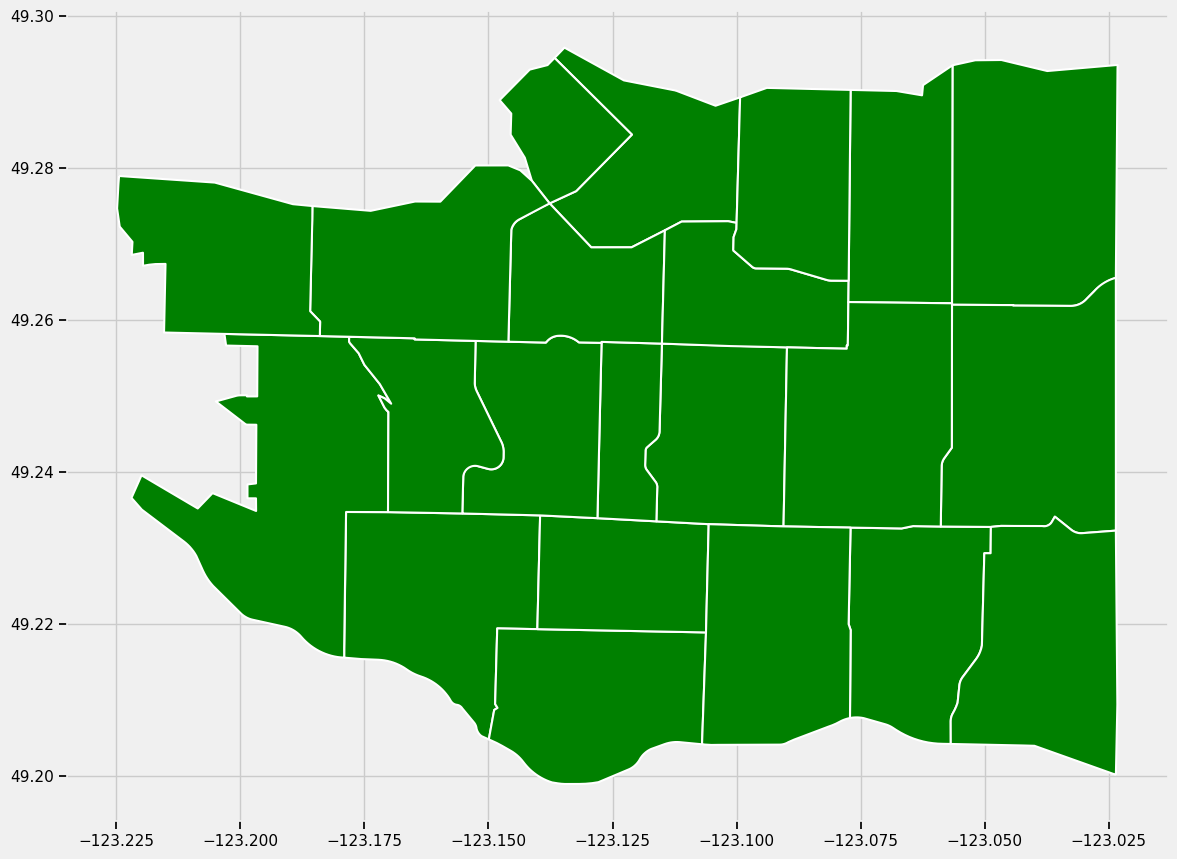

In [333]:
Vancouver_map.plot(figsize = (24,10), color = 'green', edgecolor='white', linewidth=1.5)

In [334]:
# extract neighbourhood names from Vancouver geojson
V_nbh_names = list(Vancouver_map['name'].unique())

print(V_nbh_names)


['Downtown', 'Hastings-Sunrise', 'Kerrisdale', 'Marpole', 'Oakridge', 'Riley Park', 'South Cambie', 'Shaughnessy', 'Victoria-Fraserview', 'Dunbar-Southlands', 'Fairview', 'Mount Pleasant', 'Renfrew-Collingwood', 'West End', 'Arbutus Ridge', 'Grandview-Woodland', 'Kensington-Cedar Cottage', 'Killarney', 'Kitsilano', 'Strathcona', 'Sunset', 'West Point Grey']


In [335]:
police_crime_data = list(V_crime_gdf['NEIGHBOURHOOD'].unique())
print (police_crime_data)

['Central Business District', 'West End', 'Strathcona', 'Sunset', 'Stanley Park', 'Shaughnessy', 'Fairview', 'Grandview-Woodland', 'Marpole', 'Mount Pleasant', 'Kensington-Cedar Cottage', 'Kitsilano', 'Hastings-Sunrise', 'Kerrisdale', 'Riley Park', 'Oakridge', 'Victoria-Fraserview', 'Arbutus Ridge', 'Renfrew-Collingwood', 'West Point Grey', 'Killarney', 'South Cambie', 'Dunbar-Southlands', 'Musqueam', nan]


In [336]:
CoV_local_areas = list(Vancouver_map['name'].unique())
print (CoV_local_areas)

['Downtown', 'Hastings-Sunrise', 'Kerrisdale', 'Marpole', 'Oakridge', 'Riley Park', 'South Cambie', 'Shaughnessy', 'Victoria-Fraserview', 'Dunbar-Southlands', 'Fairview', 'Mount Pleasant', 'Renfrew-Collingwood', 'West End', 'Arbutus Ridge', 'Grandview-Woodland', 'Kensington-Cedar Cottage', 'Killarney', 'Kitsilano', 'Strathcona', 'Sunset', 'West Point Grey']


In [337]:

# Find intersection (common elements)
intersection = [item for item in police_crime_data if item in CoV_local_areas]
print("Common elements:", intersection)

# Find neighbourhoods in police_crime_data but not in CoV_local_areas (difference)
difference_list1 = [item for item in police_crime_data if item not in CoV_local_areas]
print("Elements in police_crime_data but not in CoV_local_areas:", difference_list1)

# Find elements in CoV_local_areas but not in police_crime_data (difference)
difference_list2 = [item for item in CoV_local_areas if item not in police_crime_data]
print("Elements in CoV_local_areas but not in police_crime_data:", difference_list2)


Common elements: ['West End', 'Strathcona', 'Sunset', 'Shaughnessy', 'Fairview', 'Grandview-Woodland', 'Marpole', 'Mount Pleasant', 'Kensington-Cedar Cottage', 'Kitsilano', 'Hastings-Sunrise', 'Kerrisdale', 'Riley Park', 'Oakridge', 'Victoria-Fraserview', 'Arbutus Ridge', 'Renfrew-Collingwood', 'West Point Grey', 'Killarney', 'South Cambie', 'Dunbar-Southlands']
Elements in police_crime_data but not in CoV_local_areas: ['Central Business District', 'Stanley Park', 'Musqueam', nan]
Elements in CoV_local_areas but not in police_crime_data: ['Downtown']


In [338]:
# According to Google Map and Vancouver , Vancouver Central Business District is in Downtown Vancouver and Musqueam is in Dunbar-Southlands
# use Downtown centroid coordinates for crime in Central Business District, Dunbar-Southlands centroid coordinates for crime in Musqueam
# replace the neighbourhood name for Central Business District, and Musqueam
V_crime_gdf['NEIGHBOURHOOD'] = V_crime_gdf['NEIGHBOURHOOD'].replace("Central Business District", "Downtown")
V_crime_gdf['NEIGHBOURHOOD'] = V_crime_gdf['NEIGHBOURHOOD'].replace("Musqueam", "Dunbar-Southlands")

In [339]:
# Extract neighbourhood names and centroids' coordinates
V_nbh_centroid_df = pd.DataFrame({
    'NEIGHBOURHOOD': Vancouver_map['name'],
    'centroid_long': Vancouver_map.centroid.x,
    'centroid_lat': Vancouver_map.centroid.y
})

# add centroid column to Vancouver crime geodataframe based on neighbourhood column 
V_crime_gdf = V_crime_gdf.merge(V_nbh_centroid_df, on="NEIGHBOURHOOD", how='left')

# create conditions for rows where coordinates are (0,0) or NaN
mask = ((V_crime_gdf['LONGITUDE'] == 0.0) | (V_crime_gdf['LATITUDE'] == 0.0) |
        V_crime_gdf['LONGITUDE'].isna() | V_crime_gdf['LATITUDE'].isna())

# replace long and lat for these rows with the neighbourhood centroids
V_crime_gdf.loc[mask, 'LONGITUDE'] = V_crime_gdf.loc[mask, 'centroid_long']
V_crime_gdf.loc[mask, 'LATITUDE'] = V_crime_gdf.loc[mask, 'centroid_lat']

# update geometry column 
V_crime_gdf['geometry'] = gpd.points_from_xy(V_crime_gdf['LONGITUDE'], V_crime_gdf['LATITUDE'])

# Drop row where 'LONGITUDE', 'LATITUDE', and 'NEIGHBOURHOOD' are all missing
V_crime_gdf = V_crime_gdf[~((V_crime_gdf['LONGITUDE'] == 0.0) | (V_crime_gdf['LATITUDE'] == 0.0))]

# find centroid of each neighbourhood in Vancouver
Vancouver_map['centroid'] = Vancouver_map.geometry.centroid

# drop the centroid lat and long column from Vancouver crime geodataframe
V_crime_gdf = V_crime_gdf.drop(columns=['centroid_long','centroid_lat'])

V_crime_gdf

/var/folders/wq/3s798gjn2417jfrpkst87sw40000gn/T/ipykernel_88950/377896398.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  'centroid_long': Vancouver_map.centroid.x,
/var/folders/wq/3s798gjn2417jfrpkst87sw40000gn/T/ipykernel_88950/377896398.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  'centroid_lat': Vancouver_map.centroid.y
/var/folders/wq/3s798gjn2417jfrpkst87sw40000gn/T/ipykernel_88950/377896398.py:26: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  Vancouver_map['centroid'] = Vancouver_map.geometry.centroid


OFFENCE_TYPE      NEIGHBOURHOOD                OCC_DATE  \
0        Break and Enter           Downtown   2/11/2024 10:05:00 PM   
1        Break and Enter           Downtown     5/2/2024 1:33:00 AM   
2        Break and Enter           West End   3/17/2024 12:00:00 AM   
3        Break and Enter           West End    6/16/2024 4:00:00 PM   
4        Break and Enter           West End    1/8/2024 12:00:00 AM   
...                  ...                ...                     ...   
155910  Theft of Vehicle     Mount Pleasant    8/20/2022 1:30:00 PM   
155911  Theft of Vehicle           Fairview  10/31/2022 12:00:00 PM   
155912  Theft of Vehicle         Strathcona   10/28/2022 3:00:00 PM   
155913  Theft of Vehicle         Strathcona    10/2/2022 6:30:00 AM   
155914  Theft of Vehicle  Dunbar-Southlands   10/1/2022 10:00:00 PM   

        LEVEL_OF_CRIME                     geometry   LATITUDE   LONGITUDE  
0       Moderate crime  POINT (-123.13405 49.27618)  49.276180 -123.134055  
1       Moderate crime  POINT (-123.13379 49.27596)  49.275963 -123.133790  
2       Moderate crime   POINT (-123.1343 49.28497)  49.284970 -123.134298  
3       Moderate crime   POINT (-123.1343 49.28497)  49.284970 -123.134298  
4       Moderate crime  POINT (-123.13411 49.28521)  49.285213 -123.134108  
...                ...                          ...        ...         ...  
155910     Minor crime  POINT (-123.10463 49.27155)  49.271548 -123.104635  
155911     Minor crime     POINT (-123.12134 49.27)  49.269999 -123.121337  
155912     Minor crime  POINT (-123.09947 49.28185)  49.281851 -123.099466  
155913     Minor crime  POINT (-123.09947 49.28185)  49.281851 -123.099466  
155914     Minor crime  POINT (-123.20113 49.23483)  49.234834 -123.201134  

[155915 rows x 7 columns]

In [340]:
V_crime_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [341]:
Vancouver_map.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

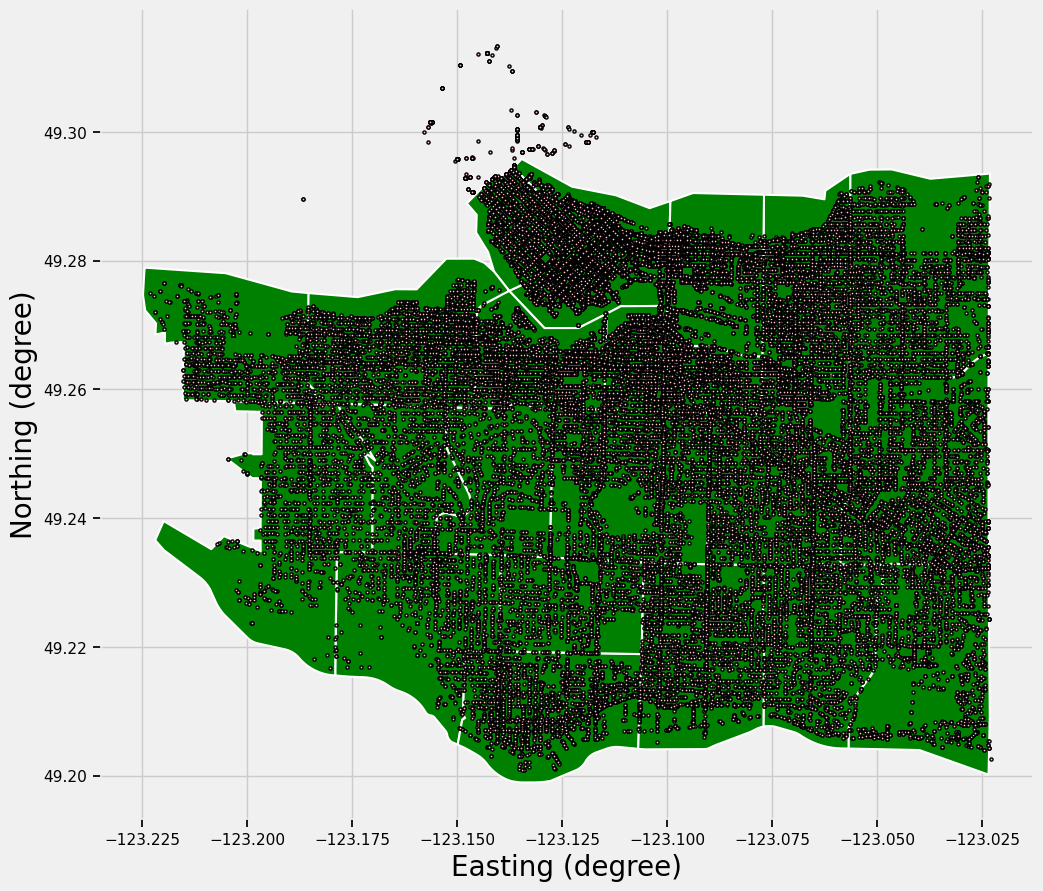

In [342]:
# plot Vancouver neighbourhoods and crime data together
ax = Vancouver_map.plot(figsize = (24,10), color='green', edgecolor='white', linewidth=1.5)
V_crime_gdf.plot(ax=ax, color='pink', edgecolor='k', label='crime event', markersize= 5)

#plt.legend(fontsize=16, loc=2)
plt.xlabel('Easting (degree)', fontsize=20)
plt.ylabel('Northing (degree)', fontsize=20)
plt.show()

Some crimes event are not in City of Vancouver local area boundry, let's drop them from the analysis

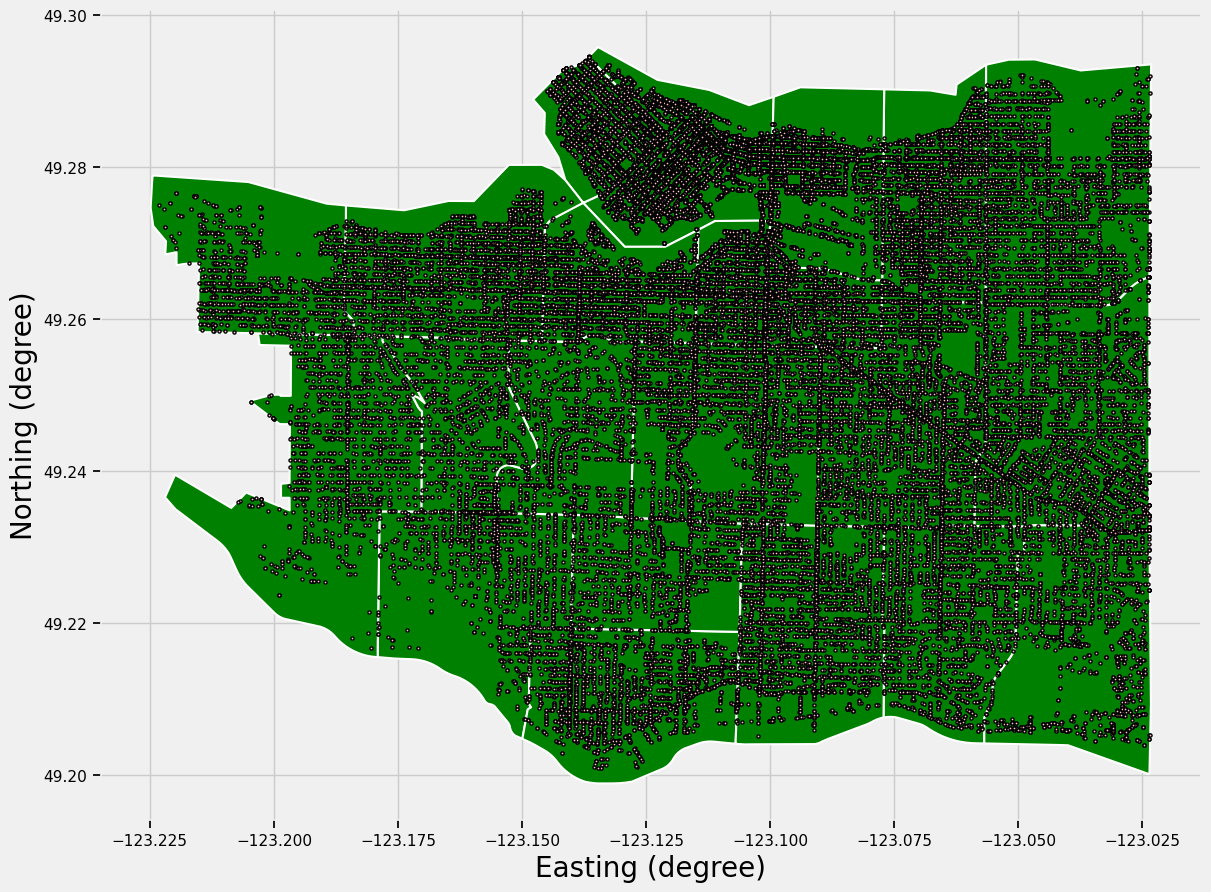

In [343]:
# Perform a spatial join, we will only keep crimes that fall within the neighbourhood boundaries
crime_within_V_bounds = gpd.sjoin(V_crime_gdf,Vancouver_map, how="inner", predicate="within")

# update V_crime_gdf
V_crime_gdf = crime_within_V_bounds

# replot Vancouver neighbourhoods and crime data together
ax = Vancouver_map.plot(figsize = (24,10), color='green', edgecolor='white', linewidth=1.5)
V_crime_gdf.plot(ax=ax, color='pink', edgecolor='k', label='crime event', markersize= 5)

# plt.legend(fontsize=16, loc=2)
plt.xlabel('Easting (degree)', fontsize=20)
plt.ylabel('Northing (degree)', fontsize=20)
plt.show()

In [344]:
# add new column that represents total crime in each neighbourhood using 'within'
Vancouver_map['Total_crimes (2020-2024)'] = Vancouver_map.apply(lambda row: V_crime_gdf.within(row.geometry).sum(),axis = 1)
Vancouver_map['Average_total_crime (per_year)'] = Vancouver_map.apply(lambda row: round(V_crime_gdf.within(row.geometry).sum()/5),axis = 1)

In [345]:
V_crime_gdf['LEVEL_OF_CRIME'].unique()

array(['Moderate crime', 'Severe crime', 'Minor crime'], dtype=object)

find total number of severe, moderate, and minor crimes in each neighbourhood

In [346]:
# generate a geodataframe for each crime level
V_severe_gdf = V_crime_gdf[V_crime_gdf['LEVEL_OF_CRIME'] == 'Severe crime'] # for severe crimes
V_moderate_gdf = V_crime_gdf[V_crime_gdf['LEVEL_OF_CRIME'] == 'Moderate crime'] # for moderate crimes
V_minor_gdf = V_crime_gdf[V_crime_gdf['LEVEL_OF_CRIME'] == 'Minor crime'] # for minor crimes

# add new column for each level of crime
Vancouver_map['Total_severe_crimes (2020-2024)'] = Vancouver_map.apply(lambda row: V_severe_gdf.within(row.geometry).sum(),axis = 1)
Vancouver_map['Average_severe_crimes (per_year)'] = Vancouver_map.apply(lambda row: round(V_severe_gdf.within(row.geometry).sum()/5),axis = 1)
Vancouver_map['Total_moderate_crimes (2020-2024)'] = Vancouver_map.apply(lambda row: V_moderate_gdf.within(row.geometry).sum(),axis = 1)
Vancouver_map['Average_moderate_crimes (per_year)'] = Vancouver_map.apply(lambda row: round(V_moderate_gdf.within(row.geometry).sum()/5),axis = 1)
Vancouver_map['Total_minor_crimes (2020-2024)'] = Vancouver_map.apply(lambda row: V_minor_gdf.within(row.geometry).sum(),axis = 1)
Vancouver_map['Average_minor_crimes (per_year)'] = Vancouver_map.apply(lambda row: round(V_minor_gdf.within(row.geometry).sum()/5),axis = 1)

Vancouver_map = Vancouver_map.drop(columns= ['centroid', 'geo_point_2d'])

In [347]:
Vancouver_map

name  \
0                   Downtown   
1           Hastings-Sunrise   
2                 Kerrisdale   
3                    Marpole   
4                   Oakridge   
5                 Riley Park   
6               South Cambie   
7                Shaughnessy   
8        Victoria-Fraserview   
9          Dunbar-Southlands   
10                  Fairview   
11            Mount Pleasant   
12       Renfrew-Collingwood   
13                  West End   
14             Arbutus Ridge   
15        Grandview-Woodland   
16  Kensington-Cedar Cottage   
17                 Killarney   
18                 Kitsilano   
19                Strathcona   
20                    Sunset   
21           West Point Grey   

                                             geometry  \
0   POLYGON ((-123.11227 49.29016, -123.10424 49.2...   
1   POLYGON ((-123.05649 49.29349, -123.0519 49.29...   
2   POLYGON ((-123.17908 49.21556, -123.17564 49.2...   
3   POLYGON ((-123.10696 49.20416, -123.11153 49.2...   
4   POLYGON ((-123.10562 49.23312, -123.10616 49.2...   
5   POLYGON ((-123.10562 49.23312, -123.11617 49.2...   
6   POLYGON ((-123.11599 49.23794, -123.11617 49.2...   
7   POLYGON ((-123.15527 49.23452, -123.15508 49.2...   
8   POLYGON ((-123.05683 49.2042, -123.05846 49.20...   
9   POLYGON ((-123.17017 49.24789, -123.17025 49.2...   
10  POLYGON ((-123.14599 49.25712, -123.1454 49.27...   
11  POLYGON ((-123.10067 49.26913, -123.09692 49.2...   
12  POLYGON ((-123.02356 49.23479, -123.02357 49.2...   
13  POLYGON ((-123.13768 49.27532, -123.14126 49.2...   
14  POLYGON ((-123.1526 49.25723, -123.16488 49.25...   
15  POLYGON ((-123.07702 49.29025, -123.06778 49.2...   
16  POLYGON ((-123.05659 49.26198, -123.05663 49.2...   
17  POLYGON ((-123.02356 49.20015, -123.03998 49.2...   
18  POLYGON ((-123.13768 49.27532, -123.14375 49.2...   
19  POLYGON ((-123.09929 49.28927, -123.0939 49.29...   
20  POLYGON ((-123.10696 49.20416, -123.10616 49.2...   
21  POLYGON ((-123.22445 49.27892, -123.20515 49.2...   

    Total_crimes (2020-2024)  Average_total_crime (per_year)  \
0                      49367                            9873   
1                       4895                             979   
2                       1477                             295   
3                       4012                             802   
4                       1595                             319   
5                       3276                             655   
6                       1668                             334   
7                       1410                             282   
8                       2680                             536   
9                       1840                             368   
10                      7292                            1458   
11                      9598                            1920   
12                     10181                            2036   
13                     13175                            2635   
14                      1417                             283   
15                      8009                            1602   
16                      5970                            1194   
17                      2576                             515   
18                      5811                            1162   
19                     12000                            2400   
20                      5717                            1143   
21                      1463                             293   

    Total_severe_crimes (2020-2024)  Average_severe_crimes (per_year)  \
0                              6539                              1308   
1                               469                                94   
2                               107                                21   
3                               354                                71   
4                               138                                28   
5                               229                             

In [348]:
V_choro_map = folium.Map(location=[49.28, -123.12], zoom_start=12)

folium.Choropleth(
    geo_data=Vancouver_map,  # Convert GeoDataFrame to GeoJSON
    data=Vancouver_map,                # GeoDataFrame containing crime data
    columns=["name", "Average_total_crime (per_year)"],  # Columns for choropleth
    key_on="feature.properties.name",  # Matches GeoJSON property for neighborhoods
    fill_color="YlOrRd",               # Gradient color scheme
    fill_opacity=0.7,                  # Fill opacity
    line_opacity=0.2,                  # Boundary line opacity
    legend_name="Average Total Crime (per Year)",  # Legend for the map
).add_to(V_choro_map)
V_choro_map

# Import Toronto house data & Export the house csv files with crime data

In [349]:
# list of input and output files names of Toronto
T_input_csv_files = ['Toronto_Houses_Facilities_0.5km.csv', 'Toronto_Houses_Facilities_1km.csv', 'Toronto_Houses_Facilities_1.5km.csv']
T_output_csv_files = ['Toronto_houses_with_crime_data_0.5km.csv', 'Toronto_houses_with_crime_data_1km.csv', 'Toronto_houses_with_crime_data_1.5km.csv']

# process each csv file
for input_file, output_file in zip(T_input_csv_files, T_output_csv_files):
    print(f"Processing {input_file}...")

    # import the house csv file into a dataframe
    T_houses_df = pd.read_csv(input_file)

    # convert lat/lon to geometry points
    T_geometry = [Point(xy) for xy in zip(T_houses_df['Longitude'], T_houses_df['Latitude'])]
    T_houses_gdf = gpd.GeoDataFrame(T_houses_df, geometry=T_geometry)

    # set CRS
    T_houses_gdf.set_crs(epsg=4326, inplace=True)

    # drop old neighbourhood column
    T_houses_gdf = T_houses_gdf.drop(columns='Neighbourhood')

    # perform a spatial join to find the neighbourhood for each house
    T_houses_with_nbhs_gdf = gpd.sjoin(T_houses_gdf, Toronto_map, how="left", predicate="within")

    # rename the new neighbourhood column and drop unnecessary columns
    T_houses_with_nbhs_gdf = T_houses_with_nbhs_gdf.rename(columns={"AREA_NAME": "Neighbourhood"})
    T_houses_with_nbhs_gdf = T_houses_with_nbhs_gdf.drop(columns=['AREA_LONG_CODE', 'index_right'])

    # save GeoDataFrame to csv
    T_houses_with_nbhs_gdf.to_csv(output_file, index=False)


    print(f"Exported processed data to {output_file}.")

print("All Toronto files processed and exported successfully.")

Processing Toronto_Houses_Facilities_0.5km.csv...
Exported processed data to Toronto_houses_with_crime_data_0.5km.csv.
Processing Toronto_Houses_Facilities_1km.csv...
Exported processed data to Toronto_houses_with_crime_data_1km.csv.
Processing Toronto_Houses_Facilities_1.5km.csv...
Exported processed data to Toronto_houses_with_crime_data_1.5km.csv.
All Toronto files processed and exported successfully.


# Import Vancouver housing data

In [350]:
# list of input and output files names of Vancouver
V_input_csv_files = ['Vancouver_Houses_Facilities_0.5km.csv', 'Vancouver_Houses_Facilities_1km.csv', 'Vancouver_Houses_Facilities_1.5km.csv']
V_output_csv_files = ['Vancouver_houses_with_crime_data_0.5km.csv', 'Vancouver_houses_with_crime_data_1km.csv', 'Vancouver_houses_with_crime_data_1.5km.csv']

# process each csv file
for input_file, output_file in zip(V_input_csv_files, V_output_csv_files):
    print(f"Processing {input_file}...")

    # import the house csv file into a dataframe
    V_houses_df = pd.read_csv(input_file)

    # convert lat/lon to geometry points
    V_geometry = [Point(xy) for xy in zip(V_houses_df['Longitude'], V_houses_df['Latitude'])]
    V_houses_gdf = gpd.GeoDataFrame(V_houses_df, geometry=V_geometry)

    # set CRS
    V_houses_gdf.set_crs(epsg=4326, inplace=True)

    # drop old neighbourhood column
    V_houses_gdf = V_houses_gdf.drop(columns='Neighbourhood')

    # perform a spatial join to find the neighbourhood for each house
    V_houses_with_nbhs_gdf = gpd.sjoin(V_houses_gdf, Vancouver_map, how="left", predicate="within")

    # rename the new neighbourhood column and drop unnecessary columns
    V_houses_with_nbhs_gdf = V_houses_with_nbhs_gdf.rename(columns={"name": "Neighbourhood"})
    V_houses_with_nbhs_gdf = V_houses_with_nbhs_gdf.drop(columns='index_right')

    # save GeoDataFrame to csv
    V_houses_with_nbhs_gdf.to_csv(output_file, index=False)


    print(f"Exported processed data to {output_file}.")

print("All Vancouver files processed and exported successfully.")

Processing Vancouver_Houses_Facilities_0.5km.csv...
Exported processed data to Vancouver_houses_with_crime_data_0.5km.csv.
Processing Vancouver_Houses_Facilities_1km.csv...
Exported processed data to Vancouver_houses_with_crime_data_1km.csv.
Processing Vancouver_Houses_Facilities_1.5km.csv...
Exported processed data to Vancouver_houses_with_crime_data_1.5km.csv.
All Vancouver files processed and exported successfully.


In [351]:
# creat a dataframe for houses do not have a neighbourhood info / crime data (Toronto)
T_error_houses_gdf = T_houses_with_nbhs_gdf[T_houses_with_nbhs_gdf['Neighbourhood'].isnull()] 
T_error_houses_gdf

Unnamed: 0            Street address Zip/Postal Code   Latitude  \
754          761    Th5 - 118 Finch Avenue             NaN  43.833506   
951          964     18 - 73 Driftwood Ave             NaN  43.940271   
1037        1052          1 Versailles Crt             NaN  43.879039   
1048        1063  Ph 3 - 850 Steeles Ave W             NaN  43.777253   
1117        1133   115 - 16 Litchfield Crt             NaN  43.860061   

      Longitude Region      Price Bedrooms Bathrooms Square Footage  ...  \
754  -79.152600    NaN   899000.0        3         3            NaN  ...   
951  -79.468319    NaN   618000.0        3         2            NaN  ...   
1037 -79.431228    NaN  4288888.0        6         7            NaN  ...   
1048 -79.514493    NaN  1198900.0        2         2            NaN  ...   
1117 -79.319494    NaN   669000.0        4         3            NaN  ...   

                        geometry  Neighbourhood  Total_crimes (2020-2024)  \
754    POINT (-79.1526 43.83351)            NaN                       NaN   
951   POINT (-79.46832 43.94027)            NaN                       NaN   
1037  POINT (-79.43123 43.87904)            NaN                       NaN   
1048  POINT (-79.51449 43.77725)            NaN                       NaN   
1117  POINT (-79.31949 43.86006)            NaN                       NaN   

      Average_total_crime (per_year)  Total_severe_crimes (2020-2024)  \
754                              NaN                              NaN   
951                              NaN                              NaN   
1037                             NaN                              NaN   
1048                             NaN                              NaN   
1117                             NaN                              NaN   

      Average_severe_crimes (per_year)  Total_moderate_crimes (2020-2024)  \
754                                NaN                                NaN   
951                                NaN                                NaN   
1037                               NaN                                NaN   
1048                               NaN                                NaN   
1117                               NaN                                NaN   

      Average_moderate_crimes (per_year)  Total_minor_crimes (2020-2024)  \
754                                  NaN                             NaN   
951                                  NaN                             NaN   
1037                                 NaN                             NaN   
1048                                 NaN                             NaN   
1117                                 NaN                             NaN   

      Average_minor_crimes (per_year)  
754                               NaN  
951                               NaN  
1037                              NaN  
1048                              NaN  
1117                              NaN  

[5 rows x 35 columns]

In [352]:
# creat a dataframe for houses do not have a neighbourhood info / crime data (Vancouver)
V_error_houses_gdf = V_houses_with_nbhs_gdf[V_houses_with_nbhs_gdf['Neighbourhood'].isnull()] 
V_error_houses_gdf

Unnamed: 0            Street address Zip/Postal Code   Latitude  \
810          810        24 7565 Oak Street             NaN  50.579180   
841          841    701 919 Station Street             NaN  48.446587   
936          936        21 7565 Oak Street             NaN  50.579624   
943          943       210 5989 Iona Drive             NaN  49.271516   
997          997  412 2388 Western Parkway             NaN  49.266543   
1011        1011    301 2288 Laurel Street             NaN  49.398369   
1039        1039    805 5728 Berton Avenue             NaN  49.254988   
1057        1057        18 6788 Oak Street             NaN  50.579180   
1066        1066       420 3563 Ross Drive             NaN  49.228977   
1093        1093     2304 183 Keefer Place             NaN  54.505508   
1124        1124    602 5629 Birney Avenue             NaN  49.253734   
1149        1149    205 5683 Hampton Place             NaN  49.184072   
1151        1151    310 5681 Birney Avenue             NaN  49.253734   
1175        1175  2688 West Mall Road 1003             NaN  49.260465   

       Longitude Region      Price Bedrooms Bathrooms Square Footage  ...  \
810  -126.921088    NaN  1559000.0     3 bd       3.0            NaN  ...   
841  -123.496882    NaN   629000.0     1 bd       1.0            NaN  ...   
936  -126.920905    NaN  1546000.0     3 bd       3.0            NaN  ...   
943  -123.250855    NaN  1550000.0     2 bd       2.0            NaN  ...   
997  -123.243857    NaN  1099000.0     2 bd       2.0            NaN  ...   
1011 -123.559673    NaN   849000.0     2 bd       1.0            NaN  ...   
1039 -123.235862    NaN  1198000.0     2 bd       2.0            NaN  ...   
1057 -126.921088    NaN  1979000.0     3 bd       3.0            NaN  ...   
1066 -122.886730    NaN  1120000.0     2 bd       2.0            NaN  ...   
1093 -128.585845    NaN  1295000.0     3 bd       2.0            NaN  ...   
1124 -123.234634    NaN   869000.0     1 bd       1.0            NaN  ...   
1149 -122.945818    NaN   699999.0     1 bd       1.0            NaN  ...   
1151 -123.234634    NaN   898000.0     1 bd       1.0            NaN  ...   
1175 -123.252229    NaN  1188000.0     2 bd       2.0            NaN  ...   

                         geometry  Neighbourhood  Total_crimes (2020-2024)  \
810   POINT (-126.92109 50.57918)            NaN                       NaN   
841   POINT (-123.49688 48.44659)            NaN                       NaN   
936    POINT (-126.9209 50.57962)            NaN                       NaN   
943   POINT (-123.25086 49.27152)            NaN                       NaN   
997   POINT (-123.24386 49.26654)            NaN                       NaN   
1011  POINT (-123.55967 49.39837)            NaN                       NaN   
1039  POINT (-123.23586 49.25499)            NaN                       NaN   
1057  POINT (-126.92109 50.57918)            NaN                       NaN   
1066  POINT (-122.88673 49.22898)            NaN                       NaN   
1093  POINT (-128.58584 54.50551)            NaN                       NaN   
1124  POINT (-123.23463 49.25373)            NaN                       NaN   
1149  POINT (-122.94582 49.18407)            NaN                       NaN   
1151  POINT (-123.23463 49.25373)            NaN                       NaN   
1175  POINT (-123.25223 49.26046)            NaN                       NaN   

      Average_total_crime (per_year)  Total_severe_crimes (2020-2024)  \
810                              NaN                              NaN   
841                              NaN                              NaN   
936                              NaN                              NaN   
943                              NaN                              NaN   
997                              NaN                              NaN   
1011                             NaN                              NaN   
1039                             NaN                              NaN   

In [353]:
# export T_error_houses_gdf and V_error_houses_gdf as csv files
T_error_houses_gdf.to_csv('Toronto_houses_outside_of_boundary.csv', index=False)
V_error_houses_gdf.to_csv('Vancouver_houses_outside_of_boundary.csv', index=False)